# Lab Assignment 1 - Classification

**----- Import all libraries here -----**

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# classifiers
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier

#metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

from sklearn.preprocessing import StandardScaler

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Data Analysis 

<span style="color:blue">Load the CSV file into a *DataFrame* object named **pima** using Pandas to examine the dataset and perform data cleaning:</span>
    
<span style="color:blue">1) Print the dtype of each column to review the data types of the attributes in the dataset. *(2 points)*</span>

In [2]:
# --- Your code here ---
pima = pd.read_csv("diabetes.csv")
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<span style="color:blue">2) Are there any missing values in the dataset? Print out the total count of missing values for the attributes in the dataset. How would you handle the missing values without deleting any record? Develop and execute an operation for that purpose accordingly. *(3 points)*</span>

In [3]:
# --- Your code here ---
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               1
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         0
Outcome                     0
dtype: int64

In [4]:
pima.fillna(pima.mean(), inplace=True)
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<span style="color:blue">--- Your answer here ---</span>


<span style="color:black">Yes, there are 3 missing values in the data set. I fill in missing value with the mean.</span>

<span style="color:blue">3) Examine Outcome by generating a bar plot showing the count of “0” and “1” in Outcome. Write down any of your insights from observing the bar plot. *(3 points)*</span>

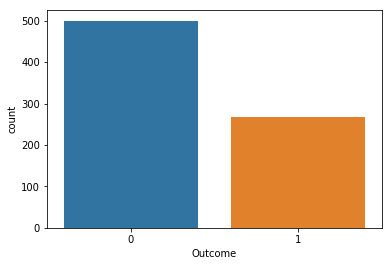

In [5]:
# --- Your code here ---
#sb.set(style=“dargrid”)
#df1=sb.melt(pima)
f1=sb.countplot(x="Outcome", data=pima)

<span style="color:blue">--- Your answer here ---</span>

<span style="color:black">The count of "0" is 500 and the count of "1" is 268. The count of "0" is nearly two times of the count of "1". The data set is imbalanced. Therefore, in the lanter model construction part, the resampling techniques can be used to improve the model, such as down-sampling (under sampling) and up-sampling (over sampling).</span>

<span style="color:blue">4) Generate a pairwise relationship scatterplot (8x8 subplots) using __sb.pairplot(pima, vars=feature_column_names, hue='Outcome')__. *(2 points)*</span>

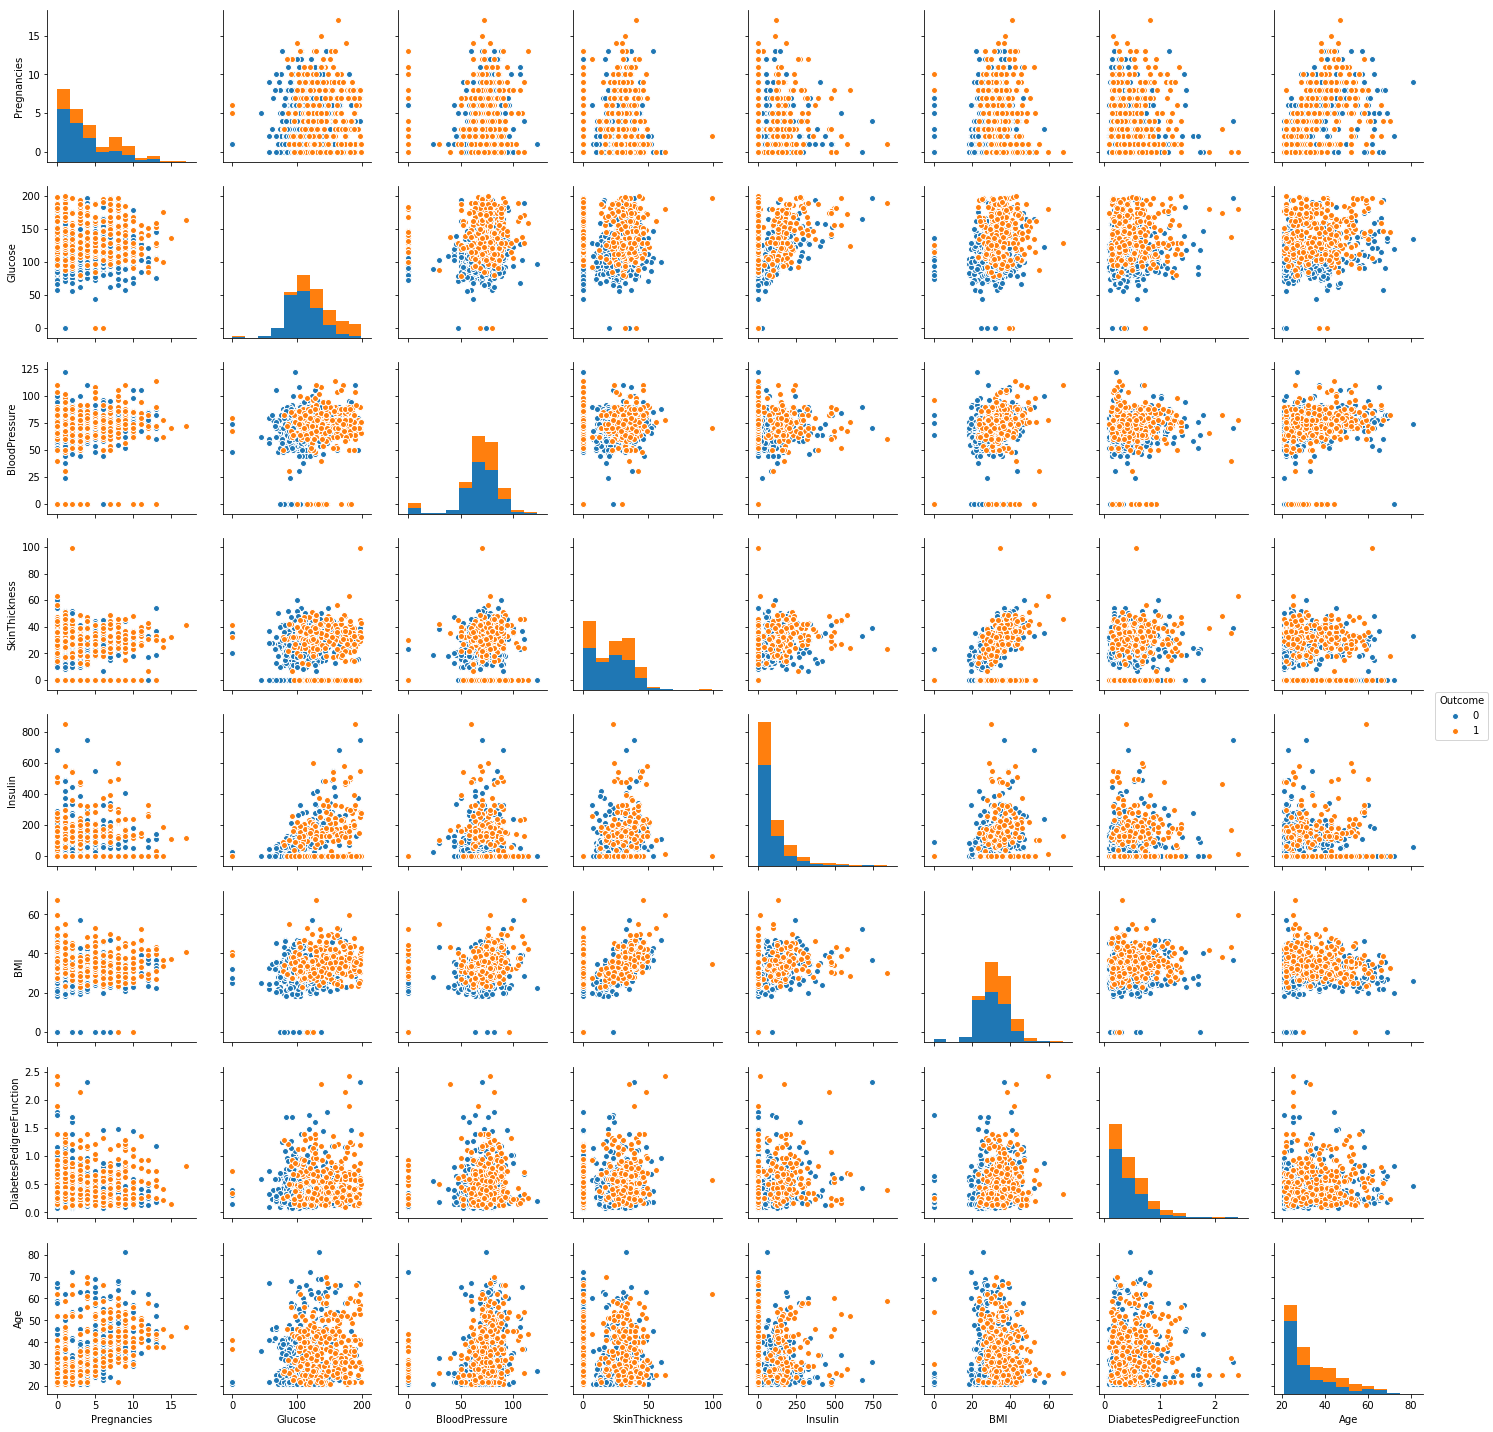

In [6]:
# --- Your code here ---
f2=sb.pairplot(pima, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome')

<span style="color:blue">5) Generate a 9x9 heatmap plot showing the co-variance between any two features (including target). *(2 points)*<br/>
    
<span style="color:blue">_(Hint: use __sb.clustermap(pima.corr(), annot=True)__ to plot co-variance heatmap.)_</span>

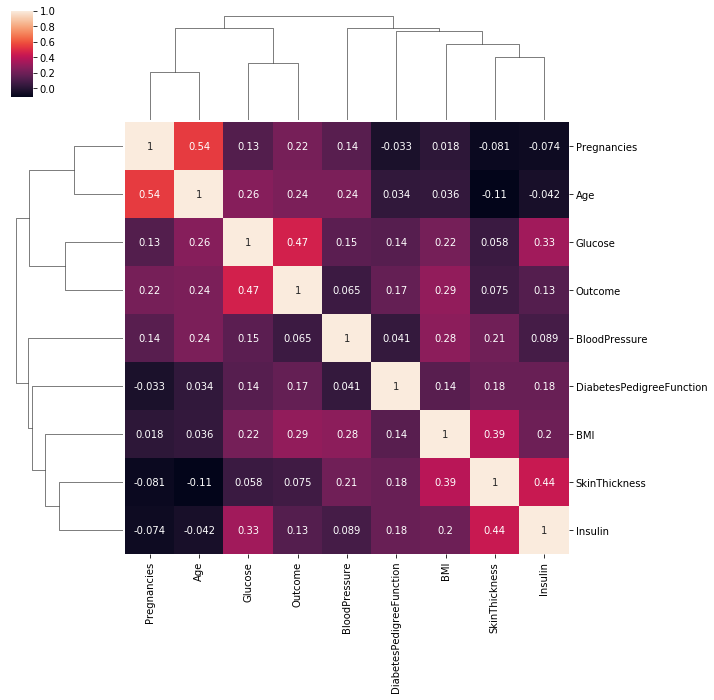

In [7]:
# --- Your code here ---
f3=sb.clustermap(pima.corr(), annot=True)

<span style="color:blue">6) What are the insights you gained from the two plots generated from 4) and 5)? *(3 points)*</span>

<span style="color:blue">_(Hint: think about how to perform feature selection based on the observations, which may be helpful for constructing your best model in Section 4.)_</span>

<span style="color:blue">--- Your answer here ---</span>

<span style="color:black">The pairwise relationship scatterplot shows that the single feature and paire feature cannot divide the two class directly.("BMI", "Glucose"), ("Age", "Glucose"), ("BloodPressure", "Glucose"), ("Pregnancies", "Glucose") and ("BMI", "Age") are better than others to split the output. The heatmap plot shows that the "Glucose" has the highest positive covariance with "Outcome", and "BMI, "Age", Pregnancies" has the higher covariance with "Outcome" than the rest feature. According to above information, the feature "Glucose", "BMI", "Age", "BloodPressure" and "Pregnancies" are more important and will be selected in the section 4 to construct the best model.</span>

# 2. Feature Transformation

We observe that all the variables in the dataset except the target variable *Outcome* are continuous. In this section, you will perform feature transformation on the continuous variables to generate two sets of features that will be used in the subsequent classification task.

**Feature set 1 - Continuous to Categorical**

<span style="color:blue">1) Often when dealing with continuous variables like *BMI* or *BloodPressure*,  we may wish  to transform these continuous variables into categorical variables, which may be better predictors of *Outcome*. This transformation can be achieved as follows: cut the continuous values of each feature into non-overlapping buckets.  Perform this operation on all 8 continuous variables.  You are to devise you own method to cut the continuous values into buckets. Name the resulting DataFrame as __pima1__. pima1 should still contains 9 conlumns with the same set of column names as pima. Use **pima1.head()** to show the top rows. *(5 points)*</span>
    
<span style="color:blue">*(Hint: you can use **pandas.cut()** or **pandas.qcut()** to convert continuous feature to categorical feature. e.g. For Glucose, if you wish to adopt the glucose level guidelines given by American Diabetes Association, you can convert its values into 3 groups:<br/>*
*- Normal > 140mg/dl of glucose,<br/>*
*- Prediabete 140-199mg/dl of glucose,<br/>*
*- Diabetes > 200mg/dl of glucose<br/>*
*using  **pd.cut(pima[’Glucose’],[50,139.99,199.99,250], labels=[0, 1, 2])**. Or you can use **pd.qcut(pima[’Glucose’],4, labels=[0,1,2,3])** to cut the values according to quantile-based discretization function.)*
</span>

In [8]:
# --- Your code here ---
pima1 = pima.copy()
for column in pima1:
    if column == 'Outcome': break
    if column == 'SkinThickness':
        pima1[column]=pd.qcut(pima1[column], 4, labels=[0,1,2],duplicates='drop')
        continue
    if column == 'Insulin':
        pima1[column]=pd.qcut(pima1[column], 4, labels=[0,1,2],duplicates='drop')
        continue
    pima1[column]=pd.qcut(pima1[column], 4, labels=[0,1,2,3])

pima1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,3,1,2,0,2,3,3,1
1,0,0,1,1,0,0,1,2,0
2,3,3,1,0,0,0,3,2,1
3,0,0,1,0,1,1,0,0,0
4,0,2,0,2,2,3,3,2,1


<span style="color:blue">2) Next, we convert the generated categorical features into binary features using the **one-hot encoding scheme**. Assume the continuous feature has m numerical labels. The one-hot encoding scheme will results in a vector of size m with only one of the values as 1 (indicating it as active). Use **pima1.head()** to show the top rows of the encoded pima1. *(2 points)*</span>

<span style="color:blue">*(Hint: you can use **pd.getdummies()** to convert each categorical feature in pima1 into multiple binary features.)*</span>

In [9]:
# --- Your code here ---
pima1=pd.get_dummies(pima1)
pima1.head()

,Outcome,Pregnancies_0,Pregnancies_1,Pregnancies_2,Pregnancies_3,Glucose_0,Glucose_1,Glucose_2,Glucose_3,BloodPressure_0,...,BMI_2,BMI_3,DiabetesPedigreeFunction_0,DiabetesPedigreeFunction_1,DiabetesPedigreeFunction_2,DiabetesPedigreeFunction_3,Age_0,Age_1,Age_2,Age_3
0,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<span style="color:blue">3) Discuss whether the use of one-hot encoding can be omitted and why? *(3 points)*</span>

<span style="color:blue">--- Your answer here ---</span>

<span style="color:black">The one-hot encoding cannot be omitted. At 2) the continous variables are transformed into categorical variables and each category value is assigned with an integer value. However, the integer encoding is not enough. This integer encoding allows the model to assume a natural ordering between categories may result in poor performance or unexpected results. For example, there are labes 0, 1 and 2. This imples the average of "0" and "2" is "1" which is definitely wrong in a categorical variable.</span>

**Feature set 2 - Features normalization**

<span style="color:blue">4) For the second feature set, we normalize the values of 8 continuous variables. For each variable, we apply the transformation using the formula **z=(x−u)/s**, where u and s are the mean and standard deviation of the variable values. Name the resulting DataFrame as **pima2**, and show the top rows using pima2.head(). *(2 points)*</span>

<span style="color:blue">*(Hint: you can use **StandardScaler** from scikit-learn for standadization purpose)*</span>

In [10]:
# --- Your code here ---
pima2 = pima.copy()
scaler=StandardScaler()
pima2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]=scaler.fit_transform(pima2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
pima2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.148924,0.908253,-0.692891,0.204013,0.469525,1.425995,1
1,-0.844885,-1.123396,-0.161329,0.531798,-0.692891,-0.684422,-0.364281,-0.190672,0
2,1.233880,1.943724,-0.264747,-1.287734,-0.692891,-1.103255,0.605472,-0.105584,1
3,-0.844885,-0.998208,-0.161329,0.155343,0.123302,-0.494043,-0.920152,-1.041549,0
4,-1.141852,0.504055,-1.505759,0.908253,0.765836,1.409746,5.487468,-0.020496,1


<span style="color:blue">5) Briefly discuss whether Feature set 1 or Feature set 2 is more useful for training classification models and why? Also comment on whether feature normalization is necessary in this case. *(3 points)*</span>

<span style="color:blue">--- Your answer here ---</span>

<span style="color:black">Feature set 2 is more useful. During the categorical encoding process, the feature set 1 loss information and power. The information gets compressed into groups which may affect the final model. The normalization is necessary in this case, it helps to obtain same range of features. For example, the range of "Pregnancies" is [0,17], while the range of "Insulin" is [0,846]. Without normalization, "insulin" will influence the model more than the "Pregnancies" due to the larger value.</span>

# 3. Model Construction

Your task in this section is to use the derived feature sets from previous section to construct classification models for diabetes outcome prediction (0 or 1).  We have splitted the data into training and test sets for you as shown below (you need to run the cell below).

In [11]:
# pima1 split
x1 = pima1.drop(columns='Outcome')
y1 = pima1['Outcome']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state=0)

# pima2 split
x2 = pima2.drop(columns='Outcome')
y2 = pima2['Outcome']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25, random_state=0)

print(x1.shape, y1.shape)
print(x2.shape, y2.shape)

(768, 30) (768,)
(768, 8) (768,)


<span style="color:blue">1) Experiment with the 5 classification models below from scikit-learn with their default hyperparameter settings on pima1 and pima2 (You should thus perform 5x2 times model training and evaluation):<br/></span>

<span style="color:blue">- Gaussian naive bayes</span><br/>
<span style="color:blue">- KNN</span><br/>
<span style="color:blue">- SVM</span><br/>
<span style="color:blue">- logistic regression</span><br/>
<span style="color:blue">- decision tree<br/></span>
    
<span style="color:blue">You should perform model training on x_train1 and x_train2,  and perform evaluation on x_test1 and x_test2 respectively.  Use **accuracy** and **weighted F1** as evaluation metrics, and save the results of different models in the defined lists **pima1_acc**, **pima2_acc**, **pima1_f1**, **pima2_f1**. Note that the order of results in each list should match the model order provided in **model_names**. Print the **accuracy_record** table and **F1_record** table using the provided code. *(20 points)*</span>

In [12]:
model_names = ['Gaussian NB', 'KNN', 'SVM', 'LR', 'DT']
pima1_acc = []
pima2_acc = []
pima1_f1 = []
pima2_f1 = []

# --- Your code here ---

clfs={
    'gnb': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(),
    'lr':  LogisticRegression(),
    'dt':  DecisionTreeClassifier()
}

for clf_name in clfs:
    print(clf_name)
    clf=clfs[clf_name]
    clf.fit(x_train1, y_train1)
    y_pred1=clf.predict(x_test1)
    pima1_acc.append(accuracy_score(y_test1, y_pred1))
    pima1_f1.append(f1_score(y_test1, y_pred1))
    
    clf.fit(x_train2, y_train2)
    y_pred2=clf.predict(x_test2)
    pima2_acc.append(accuracy_score(y_test2, y_pred2))
    pima2_f1.append(f1_score(y_test2, y_pred2))

# --- End of your code ---

accuracy_record = pd.DataFrame({'Model': model_names, 'pima1_acc': pima1_acc, 'pima2_acc': pima2_acc})
accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

F1_record = pd.DataFrame({'Model': model_names, 'pima1_f1': pima1_f1, 'pima2_f1': pima2_f1})
F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)
F1_record.set_index('Model', inplace=True)
F1_record.loc['avg'] = F1_record.mean()

print(accuracy_record)
print('\n')
print(F1_record)

gnb
knn
svm
lr
dt
             pima1_acc  pima2_acc  acc_mean
Model                                      
Gaussian NB   0.776042   0.765625      0.77
KNN           0.786458   0.812500      0.80
SVM           0.781250   0.776042      0.78
LR            0.786458   0.802083      0.79
DT            0.692708   0.718750      0.71
avg           0.764583   0.775000      0.77


             pima1_f1  pima2_f1  F1_mean
Model                                   
Gaussian NB  0.671756  0.594595     0.63
KNN          0.643478  0.689655     0.67
SVM          0.596154  0.598131     0.60
LR           0.643478  0.654545     0.65
DT           0.528000  0.571429     0.55
avg          0.616573  0.621671     0.62


<span style="color:blue">2) According to the results above, which feature set is better, pima1 or pima2? Select one to be used in the following tasks. *(2 points)*</span>

<span style="color:blue">--- Your answer ---</span>

<span style="color:black">Pima2 is better. Except GaussianNB model, all models have better accuracy and f1 score with pima2.</span>

<span style="color:blue">3) Select one classification model from 1). Discuss which are the hyperparameters that may affect the model performance the most. Perform grid search with 10 folds cross-validation for tuning those hyperparameters on the training set of either pima1 or pima2 (according to your choice in 2)), using accuracy as the scoring metric. Print the configuration of the best selected model and its prediction **accuracy** and **weighted F1** scores on the corresponding test set. *(15 points)*</span>

<span style="color:blue">*(Hint: for each selected hyperparameter, you need to prepare a list of reasonable values for tunining. Use **sklearn.model_selection.GridSearchCV** for grid search.)*</span>

<span style="color:blue">--- Your choice of hyperparameters here ---</span>

<span style="color:black">number of neighbors, weights of points, algorithm used to compute the nearest neighbors and Power parameter for the Minkowski metric.</span>

In [13]:
# --- Your code here ---
k_range = list(range(1,51))

p_range = list(range(1,3))

weight_options = ['uniform', 'distance']

algorithm_options = ['ball_tree', 'kd_tree', 'brute']

param_grid=dict(n_neighbors=k_range, weights=weight_options, algorithm=algorithm_options, p=p_range)

knn1 = KNeighborsClassifier()
grid = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train2, y_train2)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [14]:
print(grid.best_score_)
print(grid.best_params_)

0.7569444444444444
{'algorithm': 'ball_tree', 'n_neighbors': 43, 'p': 2, 'weights': 'uniform'}


In [15]:
y_pred3=grid.predict(x_test2)
print(accuracy_score(y_test2, y_pred3))
print(f1_score(y_test2, y_pred3))

0.7760416666666666
0.5656565656565656


<span style="color:blue">4) Besides accuracy and F1 scores, one can look at the confusion matrix to understand the model's prediction behaviour. Compare confusion matrix on test data before and after hyperparameter tuning for the selected model in 3). Discuss any of your observations or insights. *(5 points)*</span>

<span style="color:blue">*(Hint: you can use **confusion_matrix** from scikit-learn, and use **sb.heatmap(conf_matrix, annot=True)** to plot a corresponding heatmap for better visualization.)*</span>

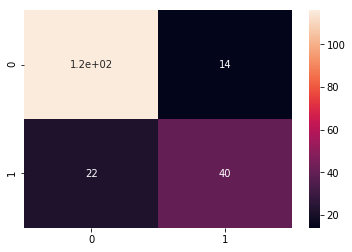

In [16]:
# --- Your code here ---
knn4 = KNeighborsClassifier()

knn4.fit(x_train2, y_train2)
y_pred4 = knn4.predict(x_test2)

confmatrixA  = confusion_matrix(y_test2, y_pred3)
confmatrixB  = confusion_matrix(y_test2, y_pred4)
f4=sb.heatmap(confmatrixB, annot=True)

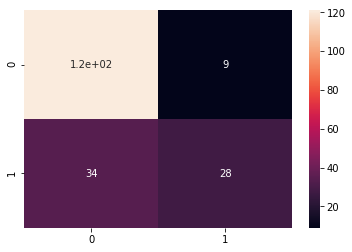

In [17]:
f5=sb.heatmap(confmatrixA, annot=True)

<span style="color:blue">--- Your observations here ---</span>

<span style="color:black">Compare before and after confusion matrix, TN is the same, FT is reduced, FN is increased and TT is reduced. The overall accuracy is reduced. In the hyperparameter tuning process, the bes model is found based on the train data set.It cannot promise that the model has better performance on test data set.</span>

<span style="color:blue">5) You can get feature importances for some tree-based classifiers in scikit-learn via **clf.feature_importances_**. Example code for plotting pima2 feature importances for an adaboost decision tree classifier has been given below. Generate the plot and describe your observations. Briefly describe how the feature importances for the given classifier can be computed. *(5 points)*</span>

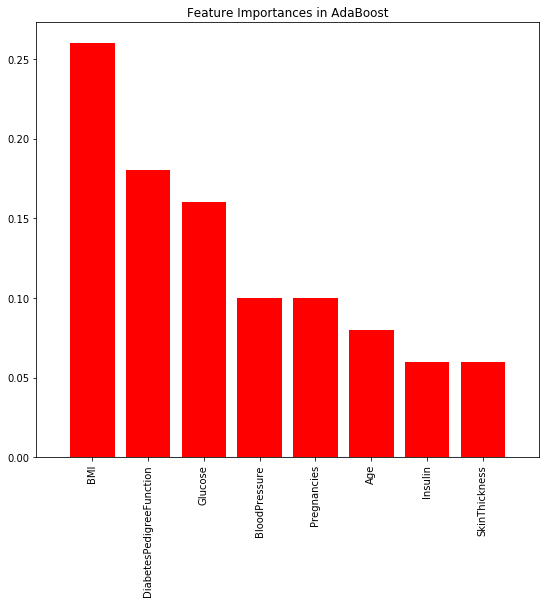

In [18]:
x_train = x_train2
y_train = y_train2

ada = AdaBoostClassifier(random_state=0)
ada.fit(x_train, y_train)
relevants = ada.feature_importances_
indices = np.argsort(relevants)[::-1]

# Plot feature importances
plt.figure(1, figsize=(9, 8))
plt.title('Feature Importances in AdaBoost')
plt.bar(range(x_train.shape[1]), relevants[indices], color='r', align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

<span style="color:blue">--- Your description here ---</span>

<span style="color:black">In decision tree, feature importance can be defined as the decrease in node impurity (weighted by the probability of reaching that node). Each feature importance can be calculated as the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits. The higher the value the more importance the feature. (Gini importance)</span>

<span style="color:blue">6)  Think  about  how  to  compute  the  feature  importances  for  other  classifiers  in  1).   Select  one classifier (except decsion tree), and generate a similar bar plot showing the feature importances. *(8 points)*</span>

In [19]:
# --- Your code here ---
acc_f = {}
f1_f = {}

for column in x_train2:
    print(column)
    clf=clfs['knn']
    clf.fit(x_train2[column].values.reshape(-1,1), y_train2)
    y_pred_f=clf.predict(x_test2[column].values.reshape(-1,1))
    f1_f[column]=f1_score(y_test2, y_pred_f)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


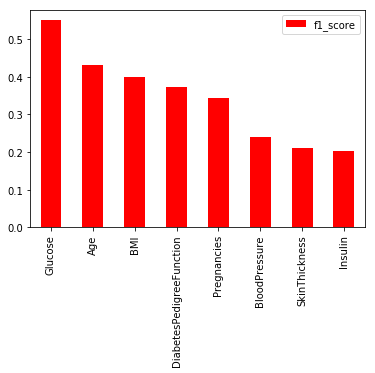

In [20]:
f1_f_df = pd.DataFrame.from_dict(f1_f, orient='index', columns=['f1_score'])
f1_f_sort = f1_f_df.sort_values(by=['f1_score'], ascending=False)
f1_f_sort.plot.bar(rot=90, color='r')

# 4. Best Model Construction

<span style="color:blue">1) Generate the best classifier you can for predicting the diabetes outcome. Show the classification **accuracy**, **weighted F1** and **confusion matrix** on test data (you should keep the original train test split). Besides that, you can also show any result or plot that are helpful for us to better understand your model. Write a short description of you model indicating the elements that help to improve prediction. You may use any classifier including but not limited to those experimented above. Marks will be given based on your model performance and description. *(13 points)*</span>

<span style="color:blue">*(Hint: you can think about improving the model performance from different aspects: e.g. improve the feature set; choose a more sophisticated classifier such as ensemble models; or improve the training process via careful hyperparameter tunning or sampling techniques.)*</span>

<span style="color:blue">--- Your description here ---</span>

<span style="color:black">Resampling is a widely used and adopted techneque for dealing with imbalanced datasets. It consists of removing smaples from the majority class (under sampling) and adding more samples to the minority class (over sampling). Since the size of given samples is small, I use over sampling method here.</span>

In [21]:
# --- Your code here ---

#over sampling
y_train_over=pd.DataFrame(y_train2)
df_all=pd.concat([x_train2, y_train_over], axis=1)

count_class_0, count_class_1 = df_all.Outcome.value_counts()
df_class_0=df_all[df_all['Outcome'] == 0]
df_class_1=df_all[df_all['Outcome'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True, random_state=0)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

<span style="color:blue">--- Your description here ---</span>

<span style="color:black">According to above information, the feature 'SkinThickness' is likely irrelevant or partially relevant. 
It might negatively impact model performance. Therefore, I drop this feature in the model construction. </span>

In [22]:
x_over = df_test_over.drop(columns=['SkinThickness', 'Outcome'])
y_over = df_test_over['Outcome']

x_test_over = x_test2.drop(columns='SkinThickness')

<span style="color:blue">--- Your description here ---</span>

<span style="color:black">Use GridSearchCV to tune the hyperparameters of bagging classifier.</span>

0.893680439148157
{'max_features': 5, 'max_samples': 1.0, 'n_estimators': 14}
0.78125
0.625


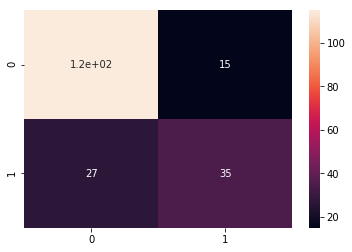

In [23]:
#tuning
n_range = list(range(5,16))

max_samples_range = np.arange(0.1, 1.1, 0.1)

max_features_range = list(range(1,8))

param_grid=dict(n_estimators=n_range, max_samples=max_samples_range, max_features=max_features_range)

clf_over_t = BaggingClassifier(clfs['dt'],random_state=0)
grid = GridSearchCV(clf_over_t, param_grid, cv=10, scoring='f1')
grid.fit(x_over, y_over)

print(grid.best_score_)
print(grid.best_params_)

y_pred_over_t=grid.predict(x_test_over)


acc_over_t = accuracy_score(y_test2, y_pred_over_t)
f1_over_t = f1_score(y_test2, y_pred_over_t)
conMatrix_over_t = confusion_matrix(y_test2, y_pred_over_t)

print(acc_over_t)
print(f1_over_t)
sb.heatmap(conMatrix_over_t, annot=True)

<span style="color:blue">--- Your description here ---</span>

<span style="color:black">I also try to manually tune the hyperparameters and find the best model for the test set.</span>

0.8229166666666666
0.7068965517241378


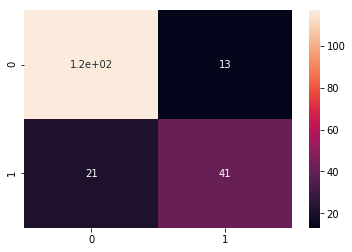

In [24]:
#best model
clf_over=BaggingClassifier(clfs['dt'], random_state=0, max_features=7, max_samples=1.0, n_estimators=15)
clf_over.fit(x_over, y_over)

y_pred_over=clf_over.predict(x_test_over)

acc_over = accuracy_score(y_test2, y_pred_over)
f1_over = f1_score(y_test2, y_pred_over)
conMatrix_over = confusion_matrix(y_test2, y_pred_over)

print(acc_over)
print(f1_over)
sb.heatmap(conMatrix_over, annot=True)

<span style="color:blue">2) Can the final model you constructed be deployed at the hospital to diagnose patients automatically?  How would the doctors explain the prediction results to the patients?  Write down any of your opinions or concerns. *(2 points)*</span>

<span style="color:blue">--- Your description here ---</span>

<span style="color:black">I think the final model is not suitable to diagnose patients automatically. According to the confusion matrix, there are 21 False Negative, while there are 41 True Negatige. This shows that there are around 0.338 probability that Diabetes cannot be detected. It's definitely a disaster.</span>